<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,92.699025,69.878605,31.938841,78.787413,0.020334,283.324218,283.314883,0.009335
1,0.0,1.0,40.250264,64.697146,70.740354,40.713651,-0.008082,226.393334,226.398256,-0.004923
2,0.0,2.0,38.644509,76.776515,67.231627,86.939051,0.003412,279.595112,279.597591,-0.002479
3,0.0,3.0,93.644038,44.757657,55.126630,82.545812,-0.011045,286.063092,286.081791,-0.018699
4,0.0,4.0,89.058339,45.101719,41.301422,88.584259,0.005541,274.051280,274.057138,-0.005858
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,97.461485,73.877081,27.935745,48.331130,0.009457,257.614897,257.604688,0.010209
19996,999.0,16.0,40.477925,90.937234,98.967902,25.900560,0.004530,266.288150,266.300456,-0.012305
19997,999.0,17.0,69.748404,93.544759,40.780678,87.207536,-0.000918,301.280458,301.271050,0.009408
19998,999.0,18.0,83.087596,75.999408,98.856630,50.096774,0.003944,318.044352,318.052209,-0.007856


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    92.699025  69.878605  31.938841  78.787413  0.020334  283.324218   
      1.0    40.250264  64.697146  70.740354  40.713651 -0.008082  226.393334   
      2.0    38.644509  76.776515  67.231627  86.939051  0.003412  279.595112   
      3.0    93.644038  44.757657  55.126630  82.545812 -0.011045  286.063092   
      4.0    89.058339  45.101719  41.301422  88.584259  0.005541  274.051280   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   97.461485  73.877081  27.935745  48.331130  0.009457  257.614897   
      16.0   40.477925  90.937234  98.967902  25.900560  0.004530  266.288150   
      17.0   69.748404  93.544759  40.780678  87.207536 -0.000918  301.280458   
      18.0   83.087596  75.999408  98.856630  50.096774  0.003944  318.044352   
      19.0   21.197976  82.593587  95.715122  36.198214  0.005477  245.710375   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    283.314883  0.009335  
      1.0    226.398256 -0.004923  
      2.0    279.597591 -0.002479  
      3.0    286.081791 -0.018699  
      4.0    274.057138 -0.005858  
...                 ...       ...  
999.0 15.0   257.604688  0.010209  
      16.0   266.300456 -0.012305  
      17.0   301.271050  0.009408  
      18.0   318.052209 -0.007856  
      19.0   245.723570 -0.013195  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    92.699025  69.878605  31.938841  78.787413  0.020334  283.324218   
      1.0    40.250264  64.697146  70.740354  40.713651 -0.008082  226.393334   
      2.0    38.644509  76.776515  67.231627  86.939051  0.003412  279.595112   
      3.0    93.644038  44.757657  55.126630  82.545812 -0.011045  286.063092   
      4.0    89.058339  45.101719  41.301422  88.584259  0.005541  274.051280   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   97.461485  73.877081  27.935745  48.331130  0.009457  257.614897   
      16.0   40.477925  90.937234  98.967902  25.900560  0.004530  266.288150   
      17.0   69.748404  93.544759  40.780678  87.207536 -0.000918  301.280458   
      18.0   83.087596  75.999408  98.856630  50.096774  0.003944  318.044352   
      19.0   21.197976  82.593587  95.715122  36.198214  0.005477  245.710375   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    283.314883  0.009335  
      1.0    226.398256 -0.004923  
      2.0    279.597591 -0.002479  
      3.0    286.081791 -0.018699  
      4.0    274.057138 -0.005858  
...                 ...       ...  
999.0 15.0   257.604688  0.010209  
      16.0   266.300456 -0.012305  
      17.0   301.271050  0.009408  
      18.0   318.052209 -0.007856  
      19.0   245.723570 -0.013195  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,92.699025,69.878605,31.938841,78.787413,0.020334,283.324218,283.314883,0.009335
1,0.0,1.0,40.250264,64.697146,70.740354,40.713651,-0.008082,226.393334,226.398256,-0.004923
2,0.0,2.0,38.644509,76.776515,67.231627,86.939051,0.003412,279.595112,279.597591,-0.002479
3,0.0,3.0,93.644038,44.757657,55.126630,82.545812,-0.011045,286.063092,286.081791,-0.018699
4,0.0,4.0,89.058339,45.101719,41.301422,88.584259,0.005541,274.051280,274.057138,-0.005858
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,97.461485,73.877081,27.935745,48.331130,0.009457,257.614897,257.604688,0.010209
19996,999.0,16.0,40.477925,90.937234,98.967902,25.900560,0.004530,266.288150,266.300456,-0.012305
19997,999.0,17.0,69.748404,93.544759,40.780678,87.207536,-0.000918,301.280458,301.271050,0.009408
19998,999.0,18.0,83.087596,75.999408,98.856630,50.096774,0.003944,318.044352,318.052209,-0.007856


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    92.699025  69.878605  31.938841  78.787413  0.020334  283.324218   
      1.0    40.250264  64.697146  70.740354  40.713651 -0.008082  226.393334   
      2.0    38.644509  76.776515  67.231627  86.939051  0.003412  279.595112   
      3.0    93.644038  44.757657  55.126630  82.545812 -0.011045  286.063092   
      4.0    89.058339  45.101719  41.301422  88.584259  0.005541  274.051280   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   97.461485  73.877081  27.935745  48.331130  0.009457  257.614897   
      16.0   40.477925  90.937234  98.967902  25.900560  0.004530  266.288150   
      17.0   69.748404  93.544759  40.780678  87.207536 -0.000918  301.280458   
      18.0   83.087596  75.999408  98.856630  50.096774  0.003944  318.044352   
      19.0   21.197976  82.593587  95.715122  36.198214  0.005477  245.710375   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    283.314883  0.009335  
      1.0    226.398256 -0.004923  
      2.0    279.597591 -0.002479  
      3.0    286.081791 -0.018699  
      4.0    274.057138 -0.005858  
...                 ...       ...  
999.0 15.0   257.604688  0.010209  
      16.0   266.300456 -0.012305  
      17.0   301.271050  0.009408  
      18.0   318.052209 -0.007856  
      19.0   245.723570 -0.013195  

[20000 rows x 8 columns]

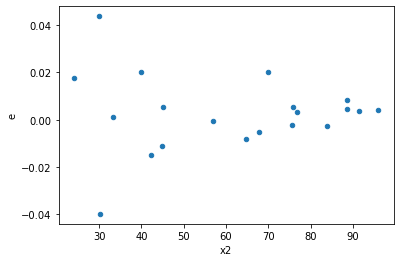

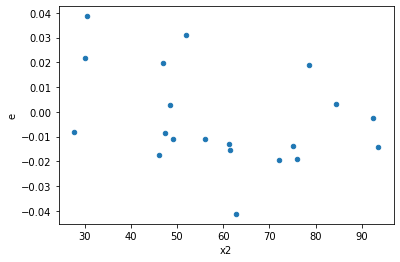

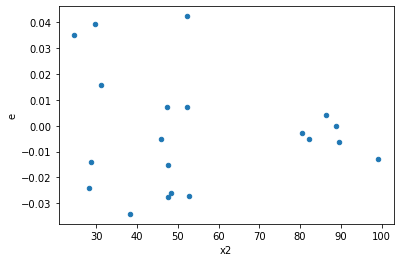

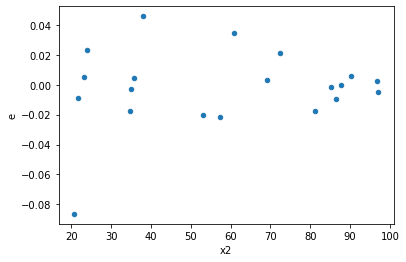

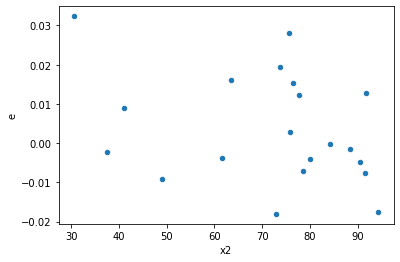

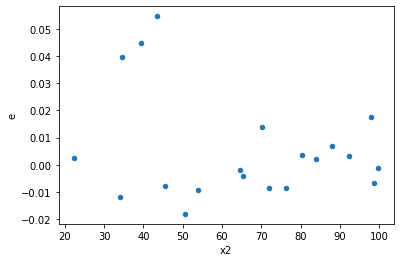

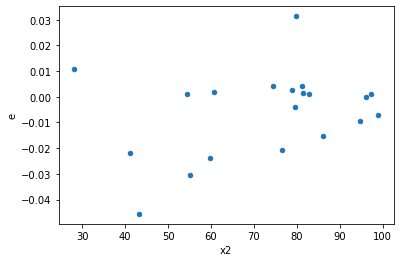

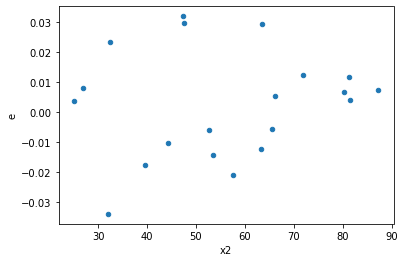

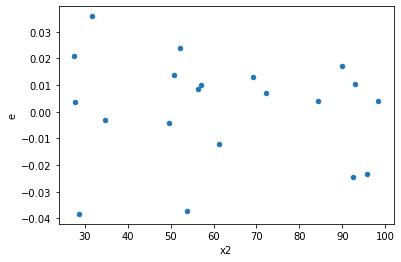

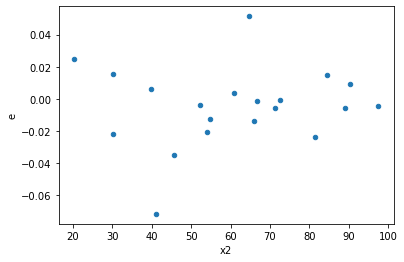

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,8.0,4.0,0.0014942134758742568,0.005436666781584132,0.0001867766844842821,0.001359166695396033,7.276961250002334,0.07254404025563743,0.9637279798721813,0.036272020127818716,Reject001=1 : Homoscedasticity
5.0,5.0,7.0,0.00039866372964221004,0.004993781314800766,7.973274592844201e-05,0.0007133973306858237,8.947356852930646,0.011971732177940009,0.99401413391103,0.005985866088970004,Reject001=1 : Homoscedasticity
7.0,5.0,7.0,0.00034581358288961954,0.0025564877896995814,6.916271657792391e-05,0.00036521254138565447,5.280482888120489,0.05011429638281495,0.9749428518085925,0.025057148191407475,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,0.0016863166813418937,0.0029788402950242337,0.00028105278022364893,0.000496473382504039,1.7664773929970312,0.5064866109313273,0.7467566945343364,0.25324330546566365,Reject001=1 : Homoscedasticity
10.0,8.0,4.0,0.0011994387729540583,0.002673912151379179,0.0001499298466192573,0.0006684780378447947,4.458605493957292,0.16536103782303724,0.9173194810884814,0.08268051891151862,Reject001=1 : Homoscedasticity
19.0,4.0,8.0,0.001734708986069818,0.004362409097435116,0.0004336772465174545,0.0005453011371793895,1.257389317881685,0.7230963659079266,0.6384518170460367,0.3615481829539633,Reject001=1 : Homoscedasticity
20.0,1.0,11.0,5.432411737713976e-26,0.0030487782879811787,5.432411737713976e-26,0.0002771616625437435,5.102000288740567e+21,0.0,1.0,0.0,Reject001=0 : Heteroscedasticity
22.0,2.0,10.0,0.00019957104816063296,0.003888624324769394,9.978552408031648e-05,0.00038886243247693937,3.896982413640955,0.1121156803710619,0.943942159814469,0.05605784018553095,Reject001=1 : Homoscedasticity
23.0,9.0,3.0,0.0008863849498039656,0.0034787379212048745,9.848721664488506e-05,0.0011595793070682916,11.773906772585336,0.06690587257971004,0.966547063710145,0.03345293628985502,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,5.0,0.0032974210731242376,0.00021935117116125195,0.0004710601533034625,4.387023423225039e-05,0.09313085372344934,0.007026944167682187,Reject001=0 : Heteroscedasticity
1.0,11.0,1.0,0.004345235044278498,2.908056841006738e-26,0.0003950213676616816,2.908056841006738e-26,7.361770980190014e-23,4.6610019282133755e-117,Reject001=0 : Heteroscedasticity
2.0,9.0,3.0,0.006980736206654691,0.00010730963894385182,0.0007756373562949657,3.5769879647950606e-05,0.04611675721604588,0.0003734326875487412,Reject001=0 : Heteroscedasticity
3.0,8.0,4.0,0.0014942134758742568,0.005436666781584132,0.0001867766844842821,0.001359166695396033,7.276961250002334,0.07254404025563743,Reject001=1 : Homoscedasticity
4.0,7.0,5.0,0.0015453189596282865,0.0004855749468679601,0.0002207598513754695,9.711498937359201e-05,0.43991236979236015,0.3141658587869995,Reject001=1 : Homoscedasticity
5.0,5.0,7.0,0.00039866372964221004,0.004993781314800766,7.973274592844201e-05,0.0007133973306858237,8.947356852930646,0.011971732177940009,Reject001=1 : Homoscedasticity
6.0,5.0,7.0,0.0019803843976234537,0.0004953300438845783,0.00039607687952469074,7.076143484065404e-05,0.17865580774512968,0.07593246207209293,Reject001=1 : Homoscedasticity
7.0,5.0,7.0,0.00034581358288961954,0.0025564877896995814,6.916271657792391e-05,0.00036521254138565447,5.280482888120489,0.05011429638281495,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,0.0016863166813418937,0.0029788402950242337,0.00028105278022364893,0.000496473382504039,1.7664773929970312,0.5064866109313273,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      736
Reject001=0 : Heteroscedasticity    264
Name: Result_test, dtype: int64